In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np
!pwd

/home/nico/Desktop/Galvanize/capstone/Fancy_food_Recommender


In [5]:
### load the meta data

data = []
with gzip.open('../reviews_Grocery_and_Gourmet_Food_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

151254
{'reviewerID': 'A1VEELTKS8NLZB', 'asin': '616719923X', 'reviewerName': 'Amazon Customer', 'helpful': [0, 0], 'reviewText': 'Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that is bothersome is the price.  I thought it was a bit expensive....', 'overall': 4.0, 'summary': 'Good Taste', 'unixReviewTime': 1370044800, 'reviewTime': '06 1, 2013'}


In [6]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

151254


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151254 entries, 0 to 151253
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewerID      151254 non-null  object 
 1   asin            151254 non-null  object 
 2   reviewerName    149761 non-null  object 
 3   helpful         151254 non-null  object 
 4   reviewText      151254 non-null  object 
 5   overall         151254 non-null  float64
 6   summary         151254 non-null  object 
 7   unixReviewTime  151254 non-null  int64  
 8   reviewTime      151254 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 10.4+ MB


# so for products we have 

reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
vote - helpful votes of the review
style - a dictionary of the product metadata, e.g., "Format" is "Hardcover"
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
image - images that users post after they have received the product

to do
change the name overall to rating
change the name reviewText to review
change the name summary to review_summary

think about style, summary, reviewTime, image, unixReview time, drop these for now. 

In [5]:
#df[df['image'].notna()]
# 70935 actually have a link to the image to show. out of 5,074,160

In [6]:
len(df['style'].notna())

5074160

In [7]:
#df['style'].head(1000)

In [8]:
df_reviews = df.drop(['reviewTime','unixReviewTime','image','style'], axis=1)
#df_reviews = df[df['vote'].fillna('0')]

In [9]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   overall       float64
 1   verified      bool   
 2   reviewerID    object 
 3   asin          object 
 4   reviewerName  object 
 5   reviewText    object 
 6   summary       object 
 7   vote          object 
dtypes: bool(1), float64(1), object(6)
memory usage: 275.8+ MB


In [10]:
#df_reviews[df_reviews['vote'].notnull()]
df_reviews['helpful_votes'] = df_reviews['vote']
df_reviews['rating'] = df_reviews['overall']
df_reviews['reviewTitle'] = df_reviews['summary']
df_reviews = df_reviews.drop(['overall','summary','vote'],axis=1)
df_reviews.head(100)

,verified,reviewerID,asin,reviewerName,reviewText,helpful_votes,rating,reviewTitle
0,True,ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,NaN,5.0,Love it
1,True,A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,NaN,4.0,Nice but small
2,True,A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,NaN,4.0,"the ""s"" looks like a 5, kina"
3,True,A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",NaN,5.0,Would recommend this to a friend!
4,True,A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,NaN,4.0,Topper
...,...,...,...,...,...,...,...,...
95,True,ADVA88NC8HPEI,4639725043,Tom Kokoshka,Tried many teas ..... this is my standard reli...,NaN,5.0,but this is very good tea at a good price
96,True,A3UHPPVPM1TRNX,4639725043,Nocal ken,Basic good morning tea.,NaN,4.0,Good morning tea
97,True,A1CMJ5QJ8AJVDC,4639725043,M. Koch,"Okay, but this is not the same Yellow Label Te...",NaN,4.0,"Okay, but this is not the same Yellow Label ..."
98,True,A2VADVLLJES4YM,4639725043,Redford John,I'm not much of a tea drinker but my wife and ...,NaN,3.0,I Prefer Coffee


In [11]:
len(df_reviews)

5074160

In [12]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   verified       bool   
 1   reviewerID     object 
 2   asin           object 
 3   reviewerName   object 
 4   reviewText     object 
 5   helpful_votes  object 
 6   rating         float64
 7   reviewTitle    object 
dtypes: bool(1), float64(1), object(6)
memory usage: 275.8+ MB


In [26]:
# df_reviews['reviewerName'] = df_reviews['reviewerName'].astype(str)
# df_reviews['reviewText'] = df_reviews['reviewText'].astype(str)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074160 entries, 0 to 5074159
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   verified       bool   
 1   reviewerID     object 
 2   asin           object 
 3   reviewerName   object 
 4   reviewText     object 
 5   helpful_votes  object 
 6   rating         float64
 7   reviewTitle    object 
dtypes: bool(1), float64(1), object(6)
memory usage: 275.8+ MB


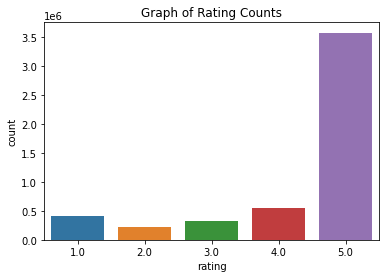

In [25]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.countplot(df_reviews['rating']).set_title("Graph of Rating Counts")
plt.show()

In [64]:
df_reviews = df_reviews.drop_duplicates(subset={"reviewerID","reviewerName","reviewText","reviewTitle"})

In [65]:
len(df_reviews)

4678158

# META DataFrame

In [31]:

### load the meta data

meta = []
with gzip.open('../meta_Grocery_and_Gourmet_Food.json.gz') as f:
    for l in f:
        meta.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(meta))

# first row of the list
print(meta[0])

287051
{'category': ['Grocery & Gourmet Food', 'Dairy, Cheese & Eggs', 'Cheese', 'Gouda'], 'tech1': '', 'description': ['BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS', 'Statements regarding dietary supplements have not been evaluated by the FDA and are not intended to diagnose, treat, cure, or prevent any disease or health condition.'], 'fit': '', 'title': 'Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs', 'also_buy': [], 'image': [], 'tech2': '', 'brand': 'Ariola Imports', 'feature': [], 'rank': '165,181 in Grocery & Gourmet Food (', 'also_view': ['B0000D9MYM', 'B0000D9MYL', 'B00ADHIGBA', 'B00H9OX598', 'B001LM42GY', 'B001LM5TDY'], 'main_cat': 'Grocery', 'similar_item': '', 'date': '', 'price': '$41.91', 'asin': '0681727810'}


In [32]:
# convert list into pandas dataframe

meta_df = pd.DataFrame.from_dict(meta)

print(len(meta_df))



287051


In [33]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   category      287051 non-null  object
 1   tech1         287051 non-null  object
 2   description   287051 non-null  object
 3   fit           287051 non-null  object
 4   title         287051 non-null  object
 5   also_buy      287051 non-null  object
 6   image         287051 non-null  object
 7   tech2         287051 non-null  object
 8   brand         287051 non-null  object
 9   feature       287051 non-null  object
 10  rank          287051 non-null  object
 11  also_view     287051 non-null  object
 12  main_cat      287051 non-null  object
 13  similar_item  287051 non-null  object
 14  date          287051 non-null  object
 15  price         287051 non-null  object
 16  asin          287051 non-null  object
 17  details       287027 non-null  object
dtypes: object(18)
memory usa

In [35]:
meta_df = meta_df.fillna('')
meta_df = meta_df.drop(['tech1','fit','also_buy', 'image','tech2', 'also_view','similar_item','date','details'],axis=1)

# hello

## for meta data
category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'image',
       'tech2', 'brand', 'feature', 'rank', 'also_view', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'details'
       

    asin - ID of the product, e.g. 0000031852
    title - name of the product
    feature - bullet-point format features of the product
    description - description of the product
    price - price in US dollars (at time of crawl)
    image - url of the product image
    related - related products (also bought, also viewed, bought together, buy after viewing)
    salesRank - sales rank information
    brand - brand name
    categories - list of categories the product belongs to
    tech1 - the first technical detail table of the product
    tech2 - the second technical detail table of the product
    similar - similar product table

       
after droping 'tech1','fit','also_buy', 'image','tech2', 'also_view','similar_item','date', I ended up with 


so someone write a text and I find the one that is most similar to it and then jsut display the title of that one and the link to the page with the asin. - maybe even the review that is similar. 

second tab you click words that relate to what you want. cheap, expensive, wet, dry, alchol, cheese, 

### 

In [42]:
# meta_df['name'] = meta_df['title']
# meta_df['features'] = meta_df['feature']
# meta_df['categories'] = meta_df['category']
# meta_df['main_category'] = meta_df['main_cat']
meta_df = meta_df.drop(['main_cat','title','feature','category'], axis = 1)
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287051 entries, 0 to 287050
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   description    287051 non-null  object
 1   brand          287051 non-null  object
 2   rank           287051 non-null  object
 3   price          287051 non-null  object
 4   asin           287051 non-null  object
 5   details        287051 non-null  object
 6   name           287051 non-null  object
 7   features       287051 non-null  object
 8   categories     287051 non-null  object
 9   main_category  287051 non-null  object
dtypes: object(10)
memory usage: 21.9+ MB


In [45]:
# not that useful
meta_df['details'].tail(1000)
meta_df = meta_df.drop(['details'], axis = 1)

In [46]:
meta_df.iloc[2]

description      [Jazz up your cakes with a sparkling monogram ...
brand                                               Unik Occasions
rank             [>#669,941 in Kitchen & Dining (See Top 100 in...
price                                                       $29.95
asin                                                    1888861118
name             Letter C - Swarovski Crystal Monogram Wedding ...
features                                                        []
categories       [Grocery & Gourmet Food, Cooking & Baking, Fro...
main_category                                          Amazon Home
Name: 2, dtype: object

In [61]:
# so in the main category of Amazon home there is 8953 , but in the not amazon home there is 278098
# and 25206 that are not amazon home or grocery
meta_df[meta_df['main_category'] == ('Grocery')].head(100)

,description,brand,rank,price,asin,name,features,categories,main_category
0,"[BEEMSTER GOUDA CHEESE AGED 18/24 MONTHS, Stat...",Ariola Imports,"165,181 in Grocery & Gourmet Food (",$41.91,0681727810,Beemster Gouda - Aged 18/24 Months - App. 1.5 Lbs,[],"[Grocery & Gourmet Food, Dairy, Cheese & Eggs,...",Grocery
1,"[Shipped from UK, please allow 10 to 21 busine...",,"315,867 in Grocery & Gourmet Food (",,0853347867,Trim Healthy Mama Xylitol,[],"[Grocery & Gourmet Food, Cooking & Baking, Sug...",Grocery
10,[Lipton Yellow Label Tea use only the finest t...,Lipton,"30,937 in Grocery & Gourmet Food (",$12.46,4639725043,Lipton Yellow Label Tea (loose tea) - 450g,[],"[Grocery & Gourmet Food, Beverages, Coffee, Te...",Grocery
11,[Lipton Yellow Label Teabags uses a new way to...,Lipton,"15,487 in Grocery & Gourmet Food (",$12.98,4639725183,Lipton Yellow Label Finest Blend Tea Bags 100 ...,[],"[Grocery & Gourmet Food, Beverages, Coffee, Te...",Grocery
12,"[Wagh Bakri Masala Chai 100's (Pack of 3), Sta...",Wagh Bakri,"121,506 in Grocery & Gourmet Food (",$25.93,4858582000,Wagh Bakri Masala Chai 100's (Pack of 3),[],"[Grocery & Gourmet Food, Beverages, Coffee, Te...",Grocery
...,...,...,...,...,...,...,...,...,...
132,[],,"1,351,212 in Grocery & Gourmet Food (",,B0000CEQUJ,"Gourmet Ceylon Tea, 3oz.",[],"[Grocery & Gourmet Food, Beverages, Coffee, Te...",Grocery
133,[Welcome to Peanut Butter perfection. 100% org...,MARANATHA,"53,285 in Grocery & Gourmet Food (",$12.41,B0000CEQD5,"Maranatha Organic Creamy Peanut Butter, No Sti...",[],"[Grocery & Gourmet Food, Jams, Jellies & Sweet...",Grocery
134,[],,"1,320,113 in Grocery & Gourmet Food (",,B0000CER5F,"Cherry Tea, 3oz.",[],"[Grocery & Gourmet Food, Beverages, Coffee, Te...",Grocery
135,[],Consorzio,"1,232,271 in Grocery & Gourmet Food (",,B0000CERDX,Annie's Homegrown Basil Flavored Olive Oil,[],"[Grocery & Gourmet Food, Cooking & Baking, Coo...",Grocery


In [ ]:
# looking for gormet food only
# lets try main category is grocery and categories is gourment food 

In [ ]:
# find out all products whose title includes a specified term uses json not pandas though
cands = []
cands2 = []
for d in meta:
    if 'title' in d and 'cheese' in d['title'].lower():
        cands.append(d)
    if 'title' in d and 'french' in d['title'].lower():
        cands2.append(d)

print(len(cands))
print(len(cands2))

In [ ]:
# finding out all products whose category includes a sperific term 



4737
2899


In [33]:
# show some example products
for d in cands[:10]:
    print(d['title'])

Blue Cheese Assortment (30 ounce)
Igourmet French Cheese Assortment, 1.8-Pound
Irish Cheese Assortment (30 ounce)
Dutch Cheese Assortment (1.8 pound)
English Cheese Assortment (2 pound)
Selection of Sheep's Milk Cheeses (1.5 pound)
igourmet's Favorites - 4 Cheese Sampler (30 ounce)
igourmet's Favorites - 8 Cheese Sampler (56 ounce)
Igourmet Oktoberfest Cheese Assortment, 2-Pound
Spanish Cheese Assortment 2 Pound Hand Cut Imported from Spain


In [34]:
# build asin set
cands_asin = set([d['asin'] for d in cands])
cands2_asin = set([d['asin'] for d in cands2])
len(cands_asin)

4680

In [38]:
from collections import defaultdict
# align products with reviews
reviews = defaultdict(list)
for l in meta:
    r = l
    a = r['asin']
    if a in cands_asin:
        reviews[a].append(r)

In [2]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('../Grocery_and_Gourmet_Food.json.gz')

In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
0,5.0,True,"06 4, 2013",ALP49FBWT4I7V,1888861614,Lori,Very pleased with my purchase. Looks exactly l...,Love it,1370304000,NaN,NaN,NaN
1,4.0,True,"05 23, 2014",A1KPIZOCLB9FZ8,1888861614,BK Shopper,Very nicely crafted but too small. Am going to...,Nice but small,1400803200,NaN,NaN,NaN
2,4.0,True,"05 9, 2014",A2W0FA06IYAYQE,1888861614,daninethequeen,still very pretty and well made...i am super p...,"the ""s"" looks like a 5, kina",1399593600,NaN,NaN,NaN
3,5.0,True,"04 20, 2014",A2PTZTCH2QUYBC,1888861614,Tammara,"I got this for our wedding cake, and it was ev...",Would recommend this to a friend!,1397952000,NaN,NaN,NaN
4,4.0,True,"04 16, 2014",A2VNHGJ59N4Z90,1888861614,LaQuinta Alexander,It was just what I want to put at the top of m...,Topper,1397606400,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5074160 entries, 0 to 5074159
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   overall         float64
 1   verified        bool   
 2   reviewTime      object 
 3   reviewerID      object 
 4   asin            object 
 5   reviewerName    object 
 6   reviewText      object 
 7   summary         object 
 8   unixReviewTime  int64  
 9   vote            object 
 10  image           object 
 11  style           object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 469.4+ MB


In [12]:
#df["vote"].astype()
df[df["vote"].notnull() ]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,image,style
13,5.0,True,"11 3, 2014",A2CHH5U12THP2D,4639725183,The Purple Bee,Best black tea in US.\n\nHighly recommend.\nI ...,Best black tea in US,1414972800,2,NaN,NaN
15,5.0,True,"05 21, 2014",A378HXZATS9HKM,4639725183,old patty,I first tasted this tea in the Far East and re...,Great Tea flavor,1400630400,2,NaN,NaN
16,5.0,True,"03 23, 2014",A2ZSQ8Y53ZNQK1,4639725183,Charles L. Mitsakos,Truly the finest tea bags in the world. Not ...,A+!,1395532800,5,NaN,NaN
17,4.0,False,"02 8, 2014",A21ZU2TINEQE0H,4639725183,Ken,Tried this while overseas last year; don't rem...,Yellow Label Lipton Tea,1391817600,2,NaN,NaN
19,5.0,True,"12 29, 2013",A1XWZJZLZTMCWK,4639725183,Tom S.,I first tasted it in Caracas on a business tri...,Best Black Tea,1388275200,11,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5074136,5.0,True,"10 4, 2017",A30N97JBKMGEHF,B01HJF6FRA,reba klauber,you would never know this was vegan is very go...,you would never know this was vegan is very go...,1507075200,2,NaN,NaN
5074137,5.0,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...","As a new vegan, it is sometimes difficult to ...",1504828800,4,NaN,NaN
5074140,5.0,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,The best thing ever is ordering a product you ...,1501804800,3,NaN,NaN
5074141,5.0,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,Just what the vegan ordered!,1499126400,5,NaN,NaN


In [ ]:
[df['vote'] == 2]

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer